In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


file is used to check the generated data

In [2]:
df = pd.read_csv("./Output Files/2020_2025_Jan.csv")


In [3]:
temp = df.drop(columns= ["Transaction ID", "Unit Price"])
item_store_level = temp.groupby(["Transaction Date","Item ID", "Store ID"]).sum(["Quantity", "Total Amount"]).reset_index()
temp = df.drop(columns= ["Transaction ID", "Unit Price", "Item ID", "Quantity"])
store_level = temp.groupby(["Transaction Date","Store ID"]).sum([ "Total Amount"]).reset_index()
store_level

,Transaction Date,Store ID,Total Amount
0,2020-01-01,CPT001,29562.37
1,2020-01-01,CPT003,51783.36
2,2020-01-01,DBN001,14994.79
3,2020-01-01,JHB001,17825.50
4,2020-01-01,STB001,15092.41
...,...,...,...
13320,2025-01-30,DBN001,29701.58
13321,2025-01-30,JHB001,16623.29
13322,2025-01-30,JHB002,75871.25
13323,2025-01-30,STB001,34072.77


### Plot using date as index

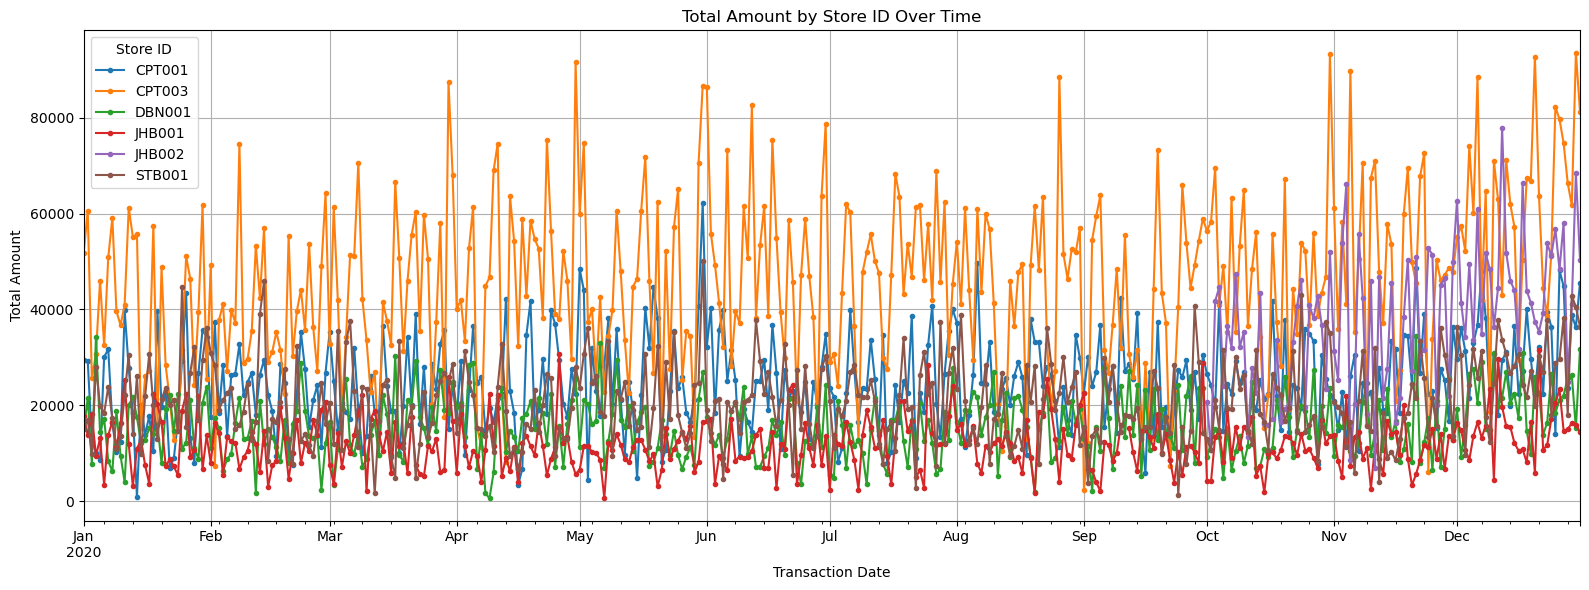

In [4]:

store_level['Transaction Date'] = pd.to_datetime(store_level['Transaction Date'])
temp = store_level[store_level['Transaction Date'].dt.year <2021]
pivot_table = temp.pivot_table(index='Transaction Date', columns='Store ID', values='Total Amount', aggfunc='sum')

# Plot the data
pivot_table.plot(figsize=(16, 6), marker = '.')

# Customize the plot
plt.title('Total Amount by Store ID Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Amount')

plt.legend(title='Store ID')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


### Plot by grouping by store


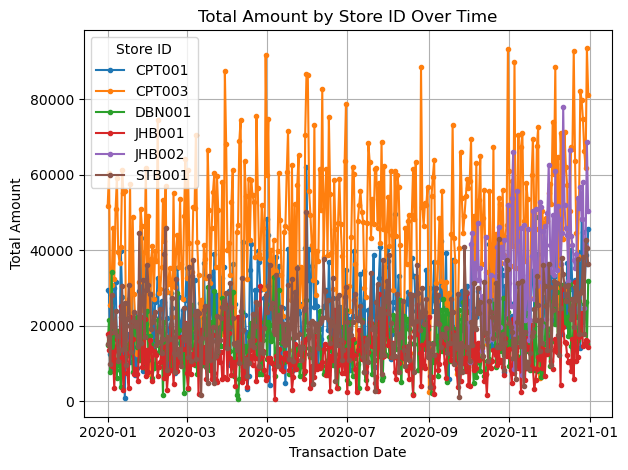

In [5]:

for store_id, group in temp.groupby('Store ID'):
    plt.plot(group['Transaction Date'], group['Total Amount'], marker='.', label=store_id)

# Customize the plot
plt.title('Total Amount by Store ID Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Amount')
plt.legend(title='Store ID')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
